# Olá pessoa, tudo bem?

Hoje vou importar uma ação qualquer, salvar o arquivo como csv e logo<br>
em seguida fazer plot do gráfico de candlestick que é o gráfico mais<br>
usado para fazer leitura pelos analistas técnicos.

- Vamos fazer o importação das bibliotecas

In [101]:
import pandas as pd
import datetime as dt
import time
import matplotlib as plt
import pandas_datareader.data as web
from matplotlib import style
import mplfinance as mpf


## Agora vamos escolher as data do inicio e do fim.

In [102]:
data_atual = time.gmtime()

inicio = dt.datetime(2022, 1, 1)
fim = dt.datetime(data_atual.tm_year, data_atual.tm_mon, 29)

### Importando as cotações do yahoo finance

In [103]:
df = web.DataReader("PETR4.SA", "yahoo", inicio, fim)

### Salvando as cotações da PETR4 em um arquivo csv

In [104]:
df.to_csv("Petr4_2022.csv")

### Lendo as primeiras 20 cotações do arquivo csv

In [105]:
df.head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,29.219999,28.530001,28.540001,29.090000,52704700.0,19.430082
2022-01-04,29.400000,28.910000,29.160000,29.200001,51739200.0,19.503555
2022-01-05,29.270000,27.940001,29.190001,28.070000,78459800.0,18.748791
2022-01-06,28.650000,27.840000,28.290001,28.049999,61163100.0,18.735435
2022-01-07,28.290001,27.820000,28.110001,28.180000,47507600.0,18.822266
2022-01-10,28.240000,27.719999,27.990000,28.010000,37455200.0,18.708717
2022-01-11,29.070000,27.850000,28.100000,28.840000,73623800.0,19.263100
2022-01-12,29.910000,28.950001,28.950001,29.719999,81378200.0,19.850878
2022-01-13,30.629999,29.500000,29.530001,30.320000,76717500.0,20.251637


### Agora vamos fazer o esboço do gráfico

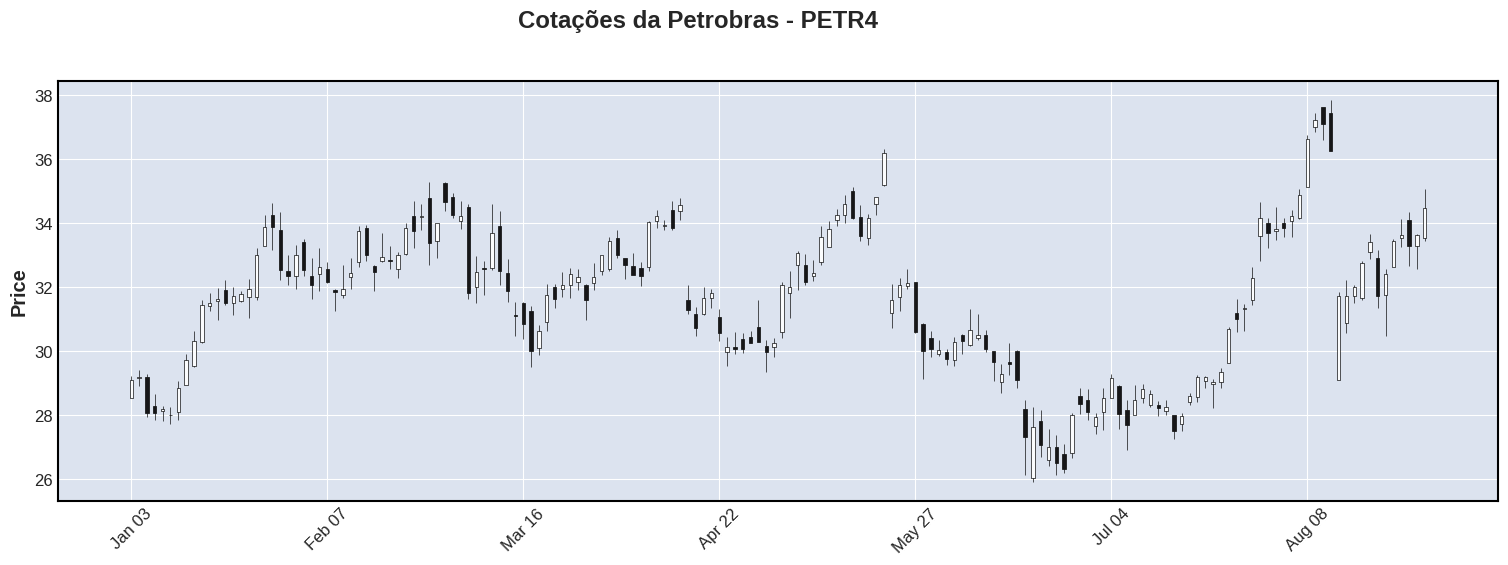

In [106]:
df = pd.read_csv("Petr4_2022.csv", parse_dates=True, index_col = 0)
mpf.plot(df, type="candle",title="Cotações da Petrobras - PETR4", figsize=(20, 6))
media = df["Adj Close"].rolling(20).mean()



In [132]:
desvs = df["Adj Close"].rolling(20).std() * 2 + df["Adj Close"].rolling(20).mean()
desvi = - df["Adj Close"].rolling(20).std() * 2 + df["Adj Close"].rolling(20).mean()
desvi



Date
2022-01-03          NaN
2022-01-04          NaN
2022-01-05          NaN
2022-01-06          NaN
2022-01-07          NaN
                ...    
2022-08-23    24.970235
2022-08-24    25.550846
2022-08-25    26.112819
2022-08-26    26.418458
2022-08-29    26.819307
Name: Adj Close, Length: 166, dtype: float64

In [133]:
valores = pd.DataFrame(desvi)
media = df["Adj Close"].mean()
valores.fillna(value=media, inplace=True)
valores

,Adj Close
Date,
2022-01-03,23.709828
2022-01-04,23.709828
2022-01-05,23.709828
2022-01-06,23.709828
2022-01-07,23.709828
...,...
2022-08-23,24.970235
2022-08-24,25.550846
2022-08-25,26.112819


In [143]:

candlestick = dict(type='candle',mav=(20), volume=True,figratio=(30,10),figscale=0.75)
color_candles = mpf.make_marketcolors(up='green',down='r',volume='blue')
estilo  = mpf.make_mpf_style(marketcolors=color_candles)


mpf.plot(media)


mpf.plot(df, **candlestick, style=estilo)


TypeError: Expect data as DataFrame

In [108]:
df_petro = web.DataReader("PETR4.SA", "yahoo", start=dt.datetime(2022,7,15), end=dt.datetime(2022,8,19))
df_ibov = web.DataReader("^BVSP", "yahoo", start=dt.datetime(2022,7,15), end=dt.datetime(2022,8,19))

In [109]:
fator_normalizado_petro = df_petro["Adj Close"].mean()
fator_normalizador_ibov = df_ibov["Adj Close"].mean()
print("{:.2f}".format(fator_normalizado_petro))
print("{:.2f}".format(fator_normalizador_ibov))
coluna_petr = df_petro["Adj Close"]
pd.DataFrame(coluna_petr)

coluna_ibov = df_ibov["Adj Close"]
pd.DataFrame(coluna_ibov)


27.81
105086.81


,Adj Close
Date,
2022-07-15,96551
2022-07-18,96916
2022-07-19,98245
2022-07-20,98287
2022-07-21,99033
2022-07-22,98925
2022-07-25,100270
2022-07-26,99772
2022-07-27,101438


<AxesSubplot:xlabel='Date'>

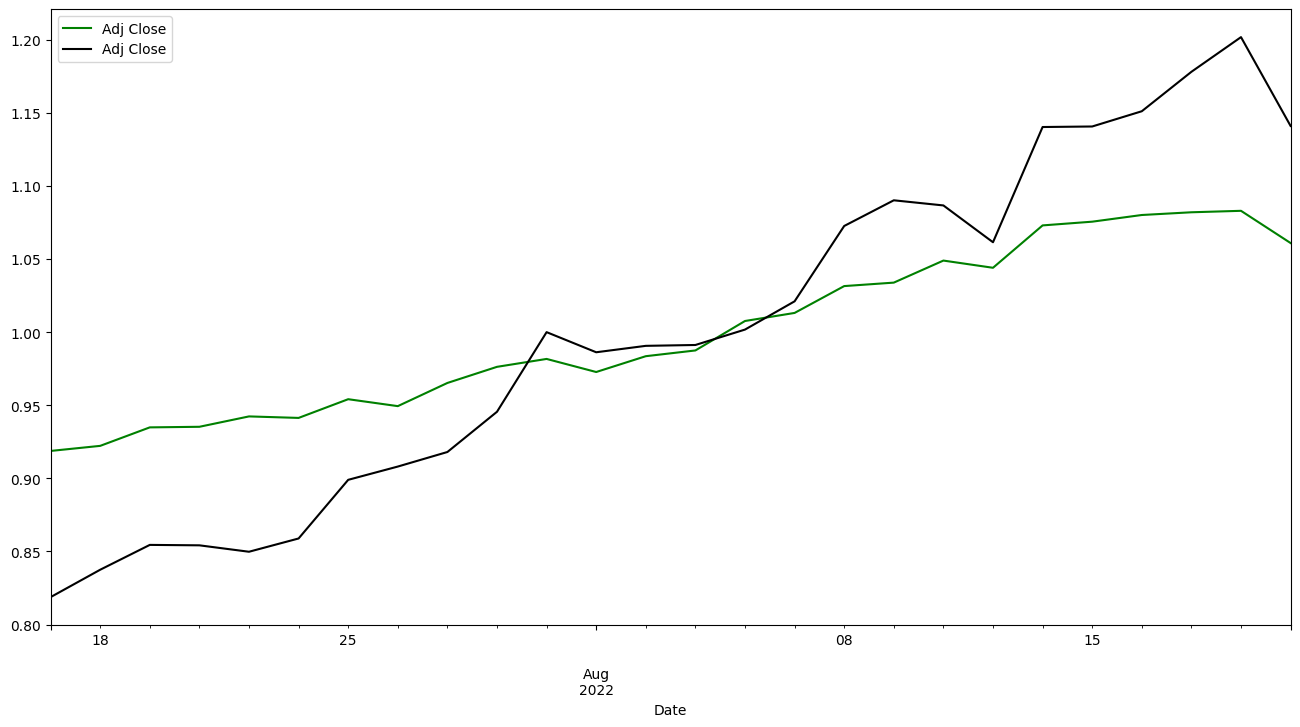

In [110]:
normaliza_petr = coluna_petr / fator_normalizado_petro
normaliza_ibov = coluna_ibov / fator_normalizador_ibov


normaliza_ibov.plot(color="g", figsize=(16,8), legend="ibove")
normaliza_petr.plot(color="black", legend="PETR4")